In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
import graphviz

from sklearn.svm import SVC

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [8]:
data = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Car.csv")
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [0]:
data['class'],class_names=pd.factorize(data['class'])
data.head()

In [0]:
data['buying'],_ = pd.factorize(data['buying'])
data['maint'],_ = pd.factorize(data['maint'])
data['doors'],_ = pd.factorize(data['doors'])
data['persons'],_ = pd.factorize(data['persons'])
data['lug_boot'],_ = pd.factorize(data['lug_boot'])
data['safety'],_ = pd.factorize(data['safety'])

In [0]:
x,y = data.iloc[:,:-1],data.iloc[:,-1]

In [0]:
x1,y1 = x.values,y.values.reshape(-1,1)

In [25]:
x1.shape,y1.shape

((1728, 6), (1728, 1))

In [0]:
xtrain,xtest,ytrain,ytest = train_test_split(x1,y1,test_size=0.3,random_state=0)

In [41]:
dtree = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
dtree.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [38]:
yResult = dtree.predict(xtest)
metrics.accuracy_score(ytest,yResult)

0.815028901734104

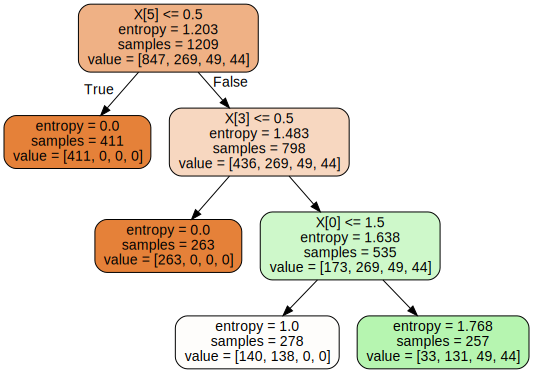

In [46]:
dot_data = tree.export_graphviz(dtree,out_file=None,filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph